In [1]:
#downloading the dataset from kaggle into colab
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:31<00:00, 23.2MB/s]
100% 1.98G/1.98G [01:31<00:00, 23.3MB/s]


In [2]:
#extracting the zip file from kaggle into the colab
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
#making a generator for batch wise inputs of train images
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 3115 files belonging to 36 classes.


In [5]:
# making a generator for batch wise inputs of validation images
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/validation',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 351 files belonging to 36 classes.


In [6]:
# making a generator for batch wise inputs of test images
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 359 files belonging to 36 classes.


In [7]:
# making the convolution neural network model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [8]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [9]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [10]:
#flatten before introducing to ANN model, transforming image from 2d to 1d
model.add(Flatten())

In [11]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [13]:
# compiling the model with binary_crossentropy since there are only two outputs fruits and vegetables
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
98/98 [==============================] - 87s 749ms/step - loss: -8740665.0000 - accuracy: 0.0238 - val_loss: -18435598.0000 - val_accuracy: 0.0256
Epoch 2/10
98/98 [==============================] - 68s 657ms/step - loss: -244827888.0000 - accuracy: 0.0241 - val_loss: -718336384.0000 - val_accuracy: 0.0256
Epoch 3/10
98/98 [==============================] - 69s 670ms/step - loss: -1734151808.0000 - accuracy: 0.0241 - val_loss: -2949984000.0000 - val_accuracy: 0.0256
Epoch 4/10
98/98 [==============================] - 69s 660ms/step - loss: -6488846336.0000 - accuracy: 0.0241 - val_loss: -9600826368.0000 - val_accuracy: 0.0256
Epoch 5/10
98/98 [==============================] - 67s 651ms/step - loss: -17539917824.0000 - accuracy: 0.0241 - val_loss: -26449422336.0000 - val_accuracy: 0.0256
Epoch 6/10
98/98 [==============================] - 69s 657ms/step - loss: -38914420736.0000 - accuracy: 0.0241 - val_loss: -39254319104.0000 - val_accuracy: 0.0256
Epoch 7/10
98/98 [=======

#Classification with example

In [15]:
#importing the libraries for handling the image
import cv2
import matplotlib.pyplot as plt

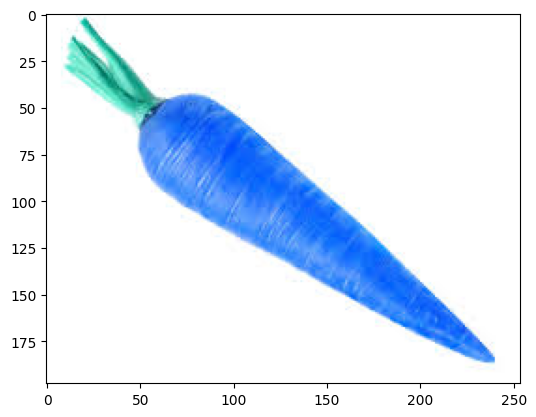

In [16]:
#reading the image with open cv
test_img = cv2.imread('/content/carrot.jpg')
plt.imshow(test_img)

In [17]:
#checking the shape of the image
test_img.shape

(198, 254, 3)

In [19]:
#resizing the image according to size of images fed to the model
test_img = cv2.resize(test_img,(256,256))

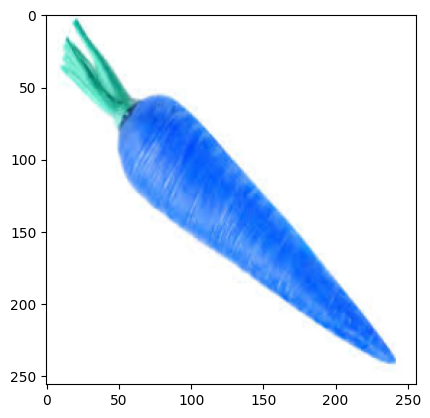

In [20]:
plt.imshow(test_img)

In [21]:
#reshaping the image to feed it to the model
test_input = test_img.reshape((1,256,256,3))

In [22]:
#prediction is correct. it identifies carrot as a vegetable
model.predict(test_input)

1/1 [==============================] - 0s 381ms/step


array([[1.]], dtype=float32)